## Костюков Максим Сергеевич
Лабораторная работа номер 1
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию

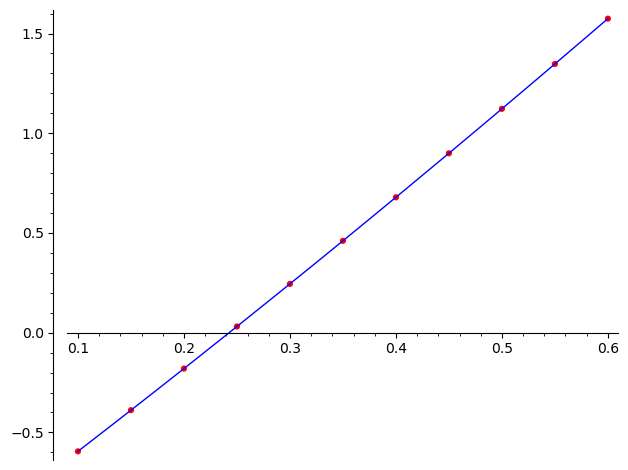

In [4]:
target_x = 0.37
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

In [5]:
def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[nodes[j]])/(x_axis[nodes[i]]-x_axis[nodes[j]])
        polinomial += sum_element
    return polinomial


In [38]:
closest_left_node = int((target_x - 0.1) / step)

L1 = lagrange(1, values, [closest_left_node, closest_left_node+1])
L2 = lagrange(2, values, [closest_left_node-1,closest_left_node, closest_left_node+1])
print(L1)
print(L2)

4.36623437688987*x - 1.06755474475884
(20.0000000000000*x - 6.99999999999999)*(6.78939005997115*x - 2.03681701799135) + (-4.89327021748789*x + 1.71264457612076)*(-10.0000000000000*x + 4.00000000000000) + (9.21254574305243*x - 2.76376372291573)*(-20.0000000000000*x + 7.99999999999999)


In [7]:
R1 = diff(y, x, 2)*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/2

In [8]:
R2 = diff(y, x, 3)*(target_x-x_axis[closest_left_node-1])*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/6

In [9]:
R1_max = R1.find_local_maximum(0.35, 0.4)[0]
R1_min = R1.find_local_minimum(0.35, 0.4)[0]
R2_min = R2.find_local_minimum(0.3, 0.4)[0]
R2_max = R2.find_local_maximum(0.3, 0.4)[0]
print(R1_max, R1_min, R2_max, R2_min, sep = "\n")

-0.00027631830007103584
-0.0002818118121456192
2.7259282637928806e-06
2.0686415211750518e-06


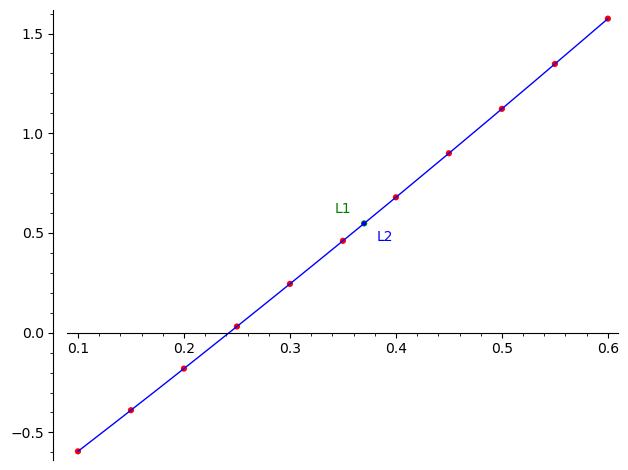

In [10]:
p += point((target_x, L1(x=target_x)), color='green', size=20)
p += text('L1', (target_x-0.02, L1(x=target_x)+0.07), color='green')
p += point((target_x, L2(x=target_x)), color='blue', size = 10)
p += text('L2', (target_x+0.02, L1(x=target_x)-0.07), color='blue')
p.show()

In [11]:
if R1_min <  y(x=target_x) - L1(x=target_x) < R1_max:
    print("Победа")

Победа


In [12]:
if R2_min < y(x=target_x) - L2(x=target_x) < R2_max:
    print("Победа")

Победа


In [47]:
def divdif():
    divdifs = [[None for i in range(len(x_axis)-i)] for i in range(len(x_axis))]
    def get_divdif(n, starting_point):
        if divdifs[starting_point][n] is not None:
            return divdifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        divdifs[starting_point][n]=(get_divdif(n-1, starting_point)-get_divdif(n-1, starting_point + 1))/(x_axis[starting_point]-x_axis[starting_point+n])
        return divdifs[starting_point][n]
    return get_divdif

divdiffer = divdif()

In [48]:
def newton(n, starting_point):
    polinomial = 0
    for i in range(starting_point, starting_point+n+1):
        sum_element = divdiffer(i-starting_point, starting_point)
        for j in range(i-starting_point):
            sum_element *= (x-x_axis[starting_point])
        polinomial += sum_element
    return polinomial


In [51]:
N1 = newton(1, closest_left_node)
N2 = newton(2, closest_left_node-1)

In [52]:
print(f"\nПолином Ньютона первого порядка: {N1}\n")
print(f"\nПолином Ньютона второго порядка: {N2}\n")
print(f"При использовании первого порядка: {N1(x=target_x)}")
print(f"При использовании второго порядка: {N2(x=target_x)}")
print(f"Эталонное значние: {y(x=target_x)}")
print(f"Погрешность для полинома первого порядка: {abs(N1(x=target_x)-y(x=target_x))}")
print(f"Погрешность для полинома второго порядка: {abs(N2(x=target_x)-y(x=target_x))}")
print(f"Погрешности для Лагранжа и Ньютона первого порядка соответственно: {abs(L1(x=target_x)-y(x=target_x))/y(x=target_x)*100}% {abs(N1(x=target_x)-y(x=target_x))/y(x=target_x)*100}%")
print(f"Погрешности для Лагранжа и Ньютона второго порядка соответственно: {abs(L2(x=target_x)-y(x=target_x))/y(x=target_x)*100}% {abs(N2(x=target_x)-y(x=target_x))/y(x=target_x)*100}%")


Полином Ньютона первого порядка: 4.36623437688988*x - 1.06755474475884


Полином Ньютона второго порядка: (x - 0.300000000000000)*(0.469588513253330*x - 0.140876553975999) + 4.31927552556454*x - 1.05111914679497

При использовании первого порядка: 0.547951974690418
При использовании второго порядка: 0.549313781378853
Эталонное значние: 0.547672654393966
Погрешность для полинома первого порядка: 0.000279320296452945
Погрешность для полинома второго порядка: 0.00164112698488772
Погрешности для Лагранжа и Ньютона первого порядка соответственно: 0.0510013224525775% 0.0510013224527397%
Погрешности для Лагранжа и Ньютона второго порядка соответственно: 0.000444209050781884% 0.299654724719409%
